Vertices: 100, Sparse Time: 0.003991s, Dense Time: 0.015636s
Vertices: 200, Sparse Time: 0.015622s, Dense Time: 0.031248s
Vertices: 500, Sparse Time: 0.109349s, Dense Time: 0.210247s
Vertices: 1000, Sparse Time: 0.446739s, Dense Time: 0.900984s
Vertices: 2000, Sparse Time: 1.616136s, Dense Time: 3.225273s


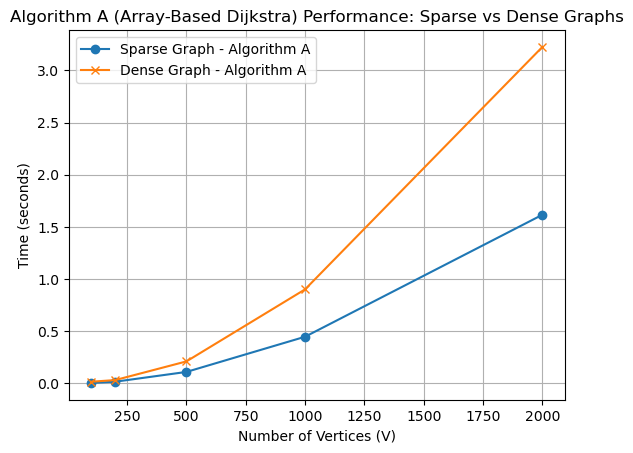

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Dijkstra's algorithm with array-based priority queue
def dijkstra_array(graph, src):
    V = len(graph)
    dist = [float('inf')] * V
    dist[src] = 0
    visited = [False] * V

    for _ in range(V):
        u = min_distance(dist, visited)
        visited[u] = True

        for v in range(V):
            if graph[u][v] > 0 and not visited[v] and dist[u] != float('inf') and dist[u] + graph[u][v] < dist[v]:
                dist[v] = dist[u] + graph[u][v]
    return dist

# Helper function to find the minimum distance vertex
def min_distance(dist, visited):
    min_val = float('inf')
    min_index = -1

    for i in range(len(dist)):
        if not visited[i] and dist[i] < min_val:
            min_val = dist[i]
            min_index = i
    return min_index

# Generate random graph
def generate_random_graph(V, E):
    graph = np.zeros((V, V))
    edge_count = 0
    while edge_count < E:
        u = np.random.randint(0, V)
        v = np.random.randint(0, V)
        if u != v and graph[u][v] == 0:  # Prevent duplicate edges
            weight = np.random.randint(1, 10)
            graph[u][v] = weight
            graph[v][u] = weight  # Undirected graph
            edge_count += 1
    return graph

# Sparse graph: E = V * log(V)
def sparse_graph(V):
    E = int(V * np.log(V))
    return generate_random_graph(V, E)

# Dense graph: E = V * (V - 1) / 2 (maximum edges)
def dense_graph(V):
    E = V * (V - 1) // 2
    return generate_random_graph(V, E)

# Function to test and compare both algorithms
def test_algo_a_sparse_dense():
    vertices = [100, 200, 500, 1000, 2000]  # List of vertices to test on
    array_times_sparse = []
    array_times_dense = []

    for V in vertices:
        # Sparse Graph
        sparse = sparse_graph(V)
        start_time = time.time()
        dijkstra_array(sparse, 0)
        time_array_sparse = time.time() - start_time
        array_times_sparse.append(time_array_sparse)

        # Dense Graph
        dense = dense_graph(V)
        start_time = time.time()
        dijkstra_array(dense, 0)
        time_array_dense = time.time() - start_time
        array_times_dense.append(time_array_dense)

        print(f"Vertices: {V}, Sparse Time: {time_array_sparse:.6f}s, Dense Time: {time_array_dense:.6f}s")

    return vertices, array_times_sparse, array_times_dense

# Plotting the results
def plot_algo_a_sparse_dense(vertices, array_times_sparse, array_times_dense):
    plt.plot(vertices, array_times_sparse, label='Sparse Graph - Algorithm A', marker='o')
    plt.plot(vertices, array_times_dense, label='Dense Graph - Algorithm A', marker='x')

    plt.xlabel('Number of Vertices (V)')
    plt.ylabel('Time (seconds)')
    plt.title('Algorithm A (Array-Based Dijkstra) Performance: Sparse vs Dense Graphs')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the test and plot the results
vertices, array_times_sparse, array_times_dense = test_algo_a_sparse_dense()
plot_algo_a_sparse_dense(vertices, array_times_sparse, array_times_dense)
